## Importing all the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV data as Pandas DataFrame

In [5]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

## Preparing X and Y

In [7]:
X = df.drop(columns=['math_score'])

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df['math_score']

In [10]:
# create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="str").columns
cat_features = X.select_dtypes(include="str").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an Evaluate Function to give all metrics after model training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K - Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set")
    print(" - Root Mean Square Error: {:>4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))
    print(" - R2 Score: {:.4f}".format(model_train_r2))

    print('___________________________________________')

    print("Model Performance for Test set")
    print(" - Root Mean Square Error: {:>4f}".format(model_test_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print("\n")

Linear Regression
Model Performance for Training set
 - Root Mean Square Error: 5.323051
 - Mean Absolute Error: 4.2667
 - R2 Score: 0.8743
___________________________________________
Model Performance for Test set
 - Root Mean Square Error: 5.393994
 - Mean Absolute Error: 4.2148
 - R2 Score: 0.8804


Lasso
Model Performance for Training set
 - Root Mean Square Error: 6.593816
 - Mean Absolute Error: 5.2063
 - R2 Score: 0.8071
___________________________________________
Model Performance for Test set
 - Root Mean Square Error: 6.519695
 - Mean Absolute Error: 5.1579
 - R2 Score: 0.8253


Ridge
Model Performance for Training set
 - Root Mean Square Error: 5.323325
 - Mean Absolute Error: 4.2650
 - R2 Score: 0.8743
___________________________________________
Model Performance for Test set
 - Root Mean Square Error: 5.390387
 - Mean Absolute Error: 4.2111
 - R2 Score: 0.8806


K - Neighbors Regressor
Model Performance for Training set
 - Root Mean Square Error: 5.707885
 - Mean Absolute 

## Results

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854977
8,AdaBoost Regressor,0.852322
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K - Neighbors Regressor,0.783813
4,Decision Tree,0.741882


# LINEAR REGRESSION

In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("AAccuracy of the model is %.2f" %score)

AAccuracy of the model is 88.04


## PLOT y_pred and y_test

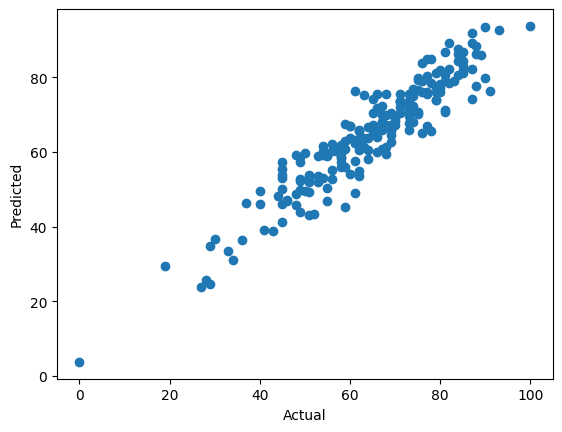

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

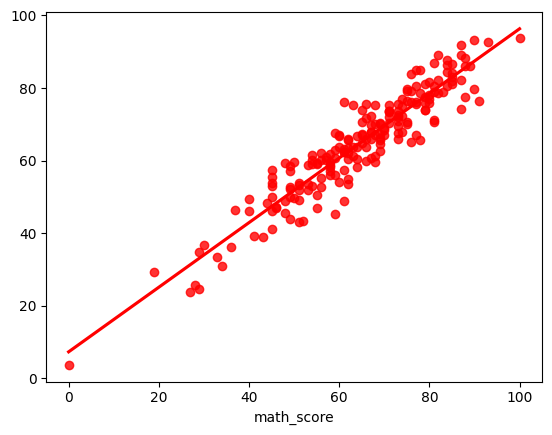

In [23]:
sns.regplot(x = y_test,y = y_pred, ci=None, color = 'red')